accuracy score: 0.983


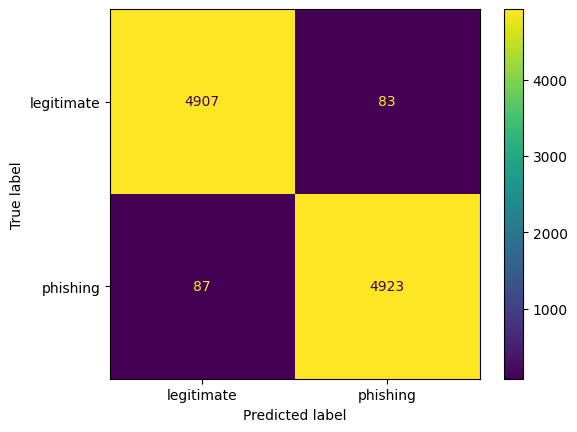

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


if __name__ == "__main__":
    data = pd.read_csv('../urlSet.csv', nrows=10000)

    # 결측값 제거
    data = data.dropna(axis=0)

    # 이상치 제거(length_url)
    data = data.drop(data.index[data['length_url'] < 0])

    # 이상치 제거(shortening_service)
    mask = data['shortening_service'].isin([0, 1])
    data = data[mask]

    # 이상치 제거(nb_at) / url의 @ 개수는 0 혹은 양의 정수만 가능
    data = data.drop(data.index[data['nb_at'] < 0])
    data = data[data['nb_at'].astype(str).str.isdigit()]

    # 이상치 제거(nb_hyphens) / url에 하이픈 개수는 0 혹은 양의 정수만 가능
    data = data.drop(data.index[data['nb_hyphens'] < 0])
    data = data[data['nb_hyphens'].astype(str).str.isdigit()]

    # 이상치 제거(https_token) / https 프로토콜이 사용되었는가 아닌가(0, 1)
    mask = data['https_token'].isin([0, 1])
    data = data[mask]

    # 이상치 제거(nb_www) / www 서브 도메인의 개수는 0 혹은 양의 정수만
    data = data.drop(data.index[data['nb_www'] < 0])
    data = data[data['nb_www'].astype(str).str.isdigit()]

    # 이상치 제거(dns_record) / dns 서버에 기록이 있는가 아닌가(0, 1)
    mask = data['dns_record'].isin([0, 1])
    data = data[mask]

    # 이상치 제거(google_index) / 구글 색인에 등록되었는가 아닌가(0, 1)
    mask = data['google_index'].isin([0, 1])
    data = data[mask]

    # 이상치 제거(page_rank) / Page rank는 0 혹은 양의 정수만 가능
    data = data.drop(data.index[data['page_rank'] < 0])
    data = data[data['page_rank'].astype(str).str.isdigit()]

    # 이상치 제거(nb_hyperlinks) / a 태그의 개수는 0 혹은 양의 정수만 가능
    data = data.drop(data.index[data['nb_hyperlinks'] < 0])
    data = data[data['nb_hyperlinks'].astype(str).str.isdigit()]

    # 데이터 전처리(피처 선택) / 데이터 셋 분리(독립변수 x / 종속변수 y)
    x = data[['length_url', 'shortening_service', 'nb_at', 'nb_hyphens',
              'https_token', 'nb_www', 'dns_record', 'page_rank', 'google_index', 'nb_hyperlinks']]
    y = data['status']

    # 학습 데이터, 검증 데이터 분리
    (x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.25)

    model = RandomForestClassifier()
    model.fit(x_train, y_train)

    # accuracy
    predicted = model.predict(x)
    accuracy = accuracy_score(y, predicted)
    print(f'accuracy score: {accuracy:.4}')

    # confusion matrix
    predictions = model.predict(x)
    cm = confusion_matrix(y, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()